# Cat Dog

- previously we use some dataset
- so it's easy because they all come in the same shape....
- today we gonna have a custom dataset from real folders....

- later on, we gonna use `torchvision.ImageFolder`
- so today, we gonna learn 
1. preprocessing
2. loading images from folders
3. using pre-trained models
   1. pre-trained models are models that people trained the model on large number of images, so we can reuse the model's trained weights - e.g., resnet

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #gives us some util functions

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Let's learn about preproessing

## Display Image
- use Pillow (PIL)
- use python `os` to walk through the url path

In [2]:
import os #mostly functions related to path and folders
from PIL import Image #Pillow is a friendly library for handling images
from IPython.display import display #to help us display image....#maybe plt.imshow

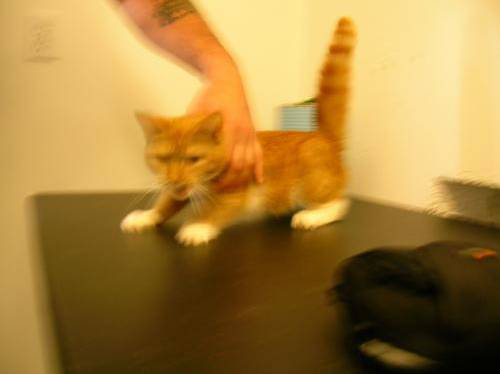

In [15]:
with Image.open('../data/cat_dog/train/cat/0.jpg') as im:
    display(im) #display is for any images....

In [11]:
#so if we want to display all images, we need to know the filename....
#so here we can use `os`
path = '../data/cat_dog/'

imagenames = []
for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        imagenames.append(folder + "/" + img)

imagenames[:5]
len(imagenames)

25004

## Let's create a DataFrame to check the statistics of the size....

In [23]:
img_sizes = []
rejected_image = []

#i believe there are some invalid images......
#to fix UnidentifiedImageError, we need to use try and catch and except
for image in imagenames:
    try:
        with Image.open(image) as im:
            img_sizes.append(im.size)
    except:
        rejected_image.append(image)
        
# print(img_sizes[:5])
# print(len(rejected_image))
# print(rejected_image[:5])

In [24]:
img_sizes[0] #is a tuple, so we can create a dataframe

(364, 500)

In [26]:
df = pd.DataFrame(img_sizes, columns = ['width', 'height'])
df.head()

,width,height
0,364,500
1,484,499
2,447,500
3,500,482
4,500,374


In [30]:
#let's try to make sense what Chaky is trying to do
#later on, I have to decide which image size I will use
#i cannot simply use different sizes
#otherwise, my neural network will not work properly.....
print(df['width'].describe())
print(df['height'].describe())

count    25000.00000
mean       404.09904
std        109.03793
min         42.00000
25%        323.00000
50%        447.00000
75%        499.00000
max       1050.00000
Name: width, dtype: float64
count    25000.000000
mean       360.478080
std         97.019959
min         32.000000
25%        301.000000
50%        374.000000
75%        421.000000
max        768.000000
Name: height, dtype: float64


## Transformations

(499, 375)


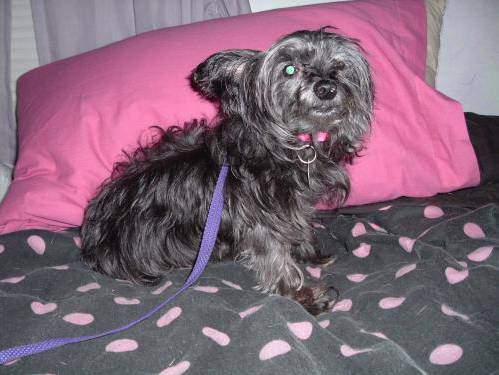

In [31]:
dog = Image.open('../data/cat_dog/train/dog/0.jpg')
print(dog.size)
display(dog)

In [32]:
#getpixel
r, g, b = dog.getpixel((0, 0))
print(r, g, b)

115 113 124


### ToTensor

In [33]:
#let's learn about normalization
#Compose is basically allowing you to combine many transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

In [38]:
print(dog.size) #W, H

(499, 375)


In [35]:
im = transform(dog)
type(im) #so you can see now that im is now a tensor

torch.Tensor

In [37]:
print(im.shape) #C, H, W

torch.Size([3, 375, 499])


In [39]:
im = im.permute((1, 2, 0)) #for plt.imshow(H, W, C)
im.shape

torch.Size([375, 499, 3])

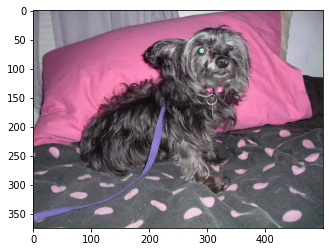

In [40]:
plt.imshow(im)

In [44]:
#so previously the pixel r g b = 115 113 124
im[0, 0, :]
#now after ToTensor, our values become [0.4510, 0.4431, 0.4863]

tensor([0.4510, 0.4431, 0.4863])

In [46]:
115 / 255, 113 / 255, 124 / 255

(0.45098039215686275, 0.44313725490196076, 0.48627450980392156)

### Resize

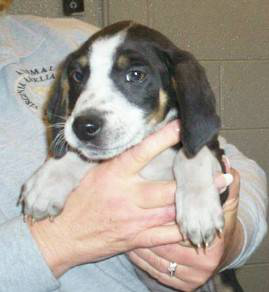

(269, 292)

In [51]:
small_dog = Image.open('../data/cat_dog/train/dog/10.jpg')
display(small_dog)
small_dog.size

torch.Size([651, 600, 3])

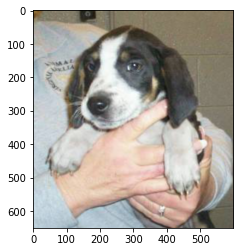

In [53]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(600)
])

im = transform(small_dog)
im = im.permute((1, 2, 0))
plt.imshow(im)

im.shape #why 651, 600 --> if height > width, then image will be rescaled to (size * height / width, size)

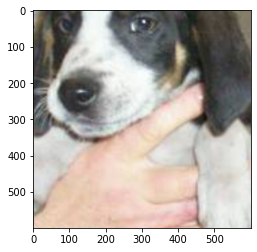

In [57]:
#very common technique to zoom in something you want
#but becareful
transform = transforms.Compose([
    transforms.Resize(1000),
    transforms.CenterCrop(600),
    transforms.ToTensor(),
])

im = transform(small_dog)
im = im.permute((1, 2, 0))
plt.imshow(im)

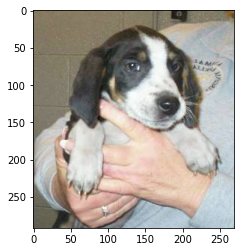

In [60]:
#why we need this randomicity?
#idea: so we can create synthetic data or basically more data
#idea: data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

im = transform(small_dog)
im = im.permute((1, 2, 0))
plt.imshow(im)

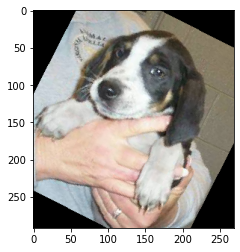

In [65]:
#why we need this randomicity?
#idea: so we can create synthetic data or basically more data
#idea: data augmentation
transform = transforms.Compose([
    transforms.RandomRotation(30),  #p=0.5
    transforms.ToTensor(),
])

im = transform(small_dog)
im = im.permute((1, 2, 0))
plt.imshow(im)

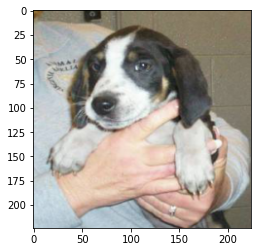

In [68]:
#why we need this randomicity?
#idea: so we can create synthetic data or basically more data
#idea: data augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  #p=0.5
    transforms.ToTensor(),
])

im = transform(small_dog)
im = im.permute((1, 2, 0))
plt.imshow(im)

In [72]:
#why we need this randomicity?
#idea: so we can create synthetic data or basically more data
#idea: data augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
])

im = transform(small_dog)
im = im.permute((1, 2, 0))
im[0, 0, :]

tensor([0.5686, 0.4784, 0.2667])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


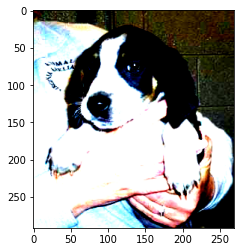

In [69]:
#why we need this randomicity?
#idea: so we can create synthetic data or basically more data
#idea: data augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

im = transform(small_dog)
im = im.permute((1, 2, 0))
plt.imshow(im)

In [71]:
#originally: [0.5686, 0.4784, 0.2667]; after normalization: [ 0.3652,  0.1001, -0.6193]
im[0, 0, :]

tensor([ 0.3652,  0.1001, -0.6193])

In [74]:
#format: number - mean / std
#mean of r, g, b [0.485, 0.456, 0.406]
#std  of r, g, b [0.229, 0.224, 0.225]

(0.5686 - 0.485) / 0.229, (0.4784 - 0.456) / 0.224, (0.2667-0.406) / 0.225

#question, how do you know what normalization to use??
#we data scientist don't know, the image experts will tell us!!
#if not, just use ToTensor()
#ToTensor simply divide by 255
#if you want to normalize properly
#1. listen the domain expert
#2. after ToTensor(), you can get the mean r g b, and also std r g b, and use that to normalize everyone!

(0.3650655021834061, 0.0999999999999999, -0.6191111111111113)

So yay!  We learn the basic preprocessing provided by pyTorch

The next thing we gonna do is load these images, do some preprocessing,
then do some neural network.

Break: 16:30 - 16:45

Why normalization?  For stability while training neural network.next

If you want to normalize based on mean/std  --> `torchvision.transforms.Normalize()`

## Let's do deep learning!!

In [ ]:
#define the transforms for train and test
#before I teach you the transforms, you need to learn offline and online augmentations

#offline augmentations - so you basically manually rotate/flip/crop and add 
# those images to your original dataset, hence the dataset size increases
#NOT RECOMMENDED - because your size of dataset will increase!!

#online augmentations - on every batch, you perform rotate/flip/crop randomly (using probability),
#and thus naturally asking your model to model these random changes
#RECOMMENDED - because your size of dataset will not increase!
#LUCKILY - by simply putting transforms inside the dataset, it will be automatically for you!

## 1. ETL

In [77]:
#idea is for training, we gonna have online augmentations
train_transform = transforms.Compose([
    transforms.RandomRotation(10),  #why 10?  I don't know!
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224), #so the shortest size will be 224
    transforms.CenterCrop(224),  #so the longest side will be 224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],   #this is provided by domain expert!
                         [0.229, 0.224, 0.225])
])

#for testing, NO augmentations!!!
test_transform = transforms.Compose([
    transforms.Resize(224), #so the shortest size will be 224
    transforms.CenterCrop(224),  #so the longest side will be 224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],   #this is provided by domain expert!
                         [0.229, 0.224, 0.225])
])
#why RandomRotation??, RandomHorizontalFlip??

In [78]:
#set the ImageFolder
#ImageFolder:
'''
root/dog/xxx.png
root/dog/xxy.png
root/dog/[...]/xxz.png
root/cat/123.png
root/cat/nsdf3.png
root/cat/[...]/asd932_.png
'''

root = '../data/cat_dog/'
train_path = os.path.join(root, 'train')
test_path = os.path.join(root,  'test')

train_data = datasets.ImageFolder(train_path, transform=train_transform)
test_data  = datasets.ImageFolder(test_path,  transform=test_transform)
#actually, best practices is that you need validation data, but today let's keep it simple

In [81]:
#when you use ImageFolder, the class_names are automatically extracted
#based on the folder structure
train_data.classes

['cat', 'dog']

In [82]:
len(train_data), len(test_data)

(18002, 6998)

In [79]:
#create Dataloader
torch.manual_seed(9999) #you can put this in the top....

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_data,  batch_size=batch_size, shuffle=False)

## 2. EDA
-Display 10 images using `make_grid`
- you don't have to sort....

In [83]:
for images, labels in train_loader:
    break

images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [84]:
#can you display 10 images for me using make_grid()
images = images[:10]
labels = labels[:10]

0 1 0 1 1 0 1 1 0 1
cat dog cat dog dog cat dog dog cat dog


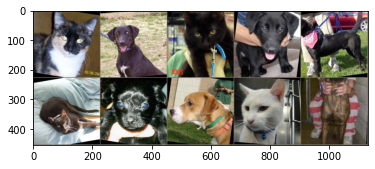

In [94]:
from torchvision.utils import make_grid

print(*(labels.numpy()))
print(*[train_data.classes[label] for label in labels])

#display 10 images
im = make_grid(images, nrow=5)

#denormlize the images....
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

im_inv = inv_normalize(im)
im_inv = im_inv.permute((1, 2, 0))

plt.imshow(im_inv)

## 3. Defining the model

In [96]:
#define a neural network

#conv2d(3 -> 6 -> 16) #after each conv, put a relu then follow by maxpool(2, 2)
#linear(? -> 120 -> 84 -> 2) #for the first two linear layers, put a relu after
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [97]:
#test your model
#get a image
#try your run your model!!

In [98]:
torch.manual_seed(101)
CNNmodel  = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)

In [99]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

In [101]:
# count_parameters(CNNmodel)
#why 162? why 6?

## 4. Training

In [103]:
import time
start_time = time.time()

epochs = 3

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

In [104]:
#plot the loss
#confusion matrix to understand your work
#perform your model on the testing set!

## Appendix: Using a pre-trained model

Idea: Pre-trained model is model weights in which some people have trained on a very huge dataset!  So why not we borrow their weights!!  And just train the last layer, which is the 2 neurons - cat and dogs.... 

In [112]:
from torchvision import models
from torchvision.models import AlexNet_Weights

In [121]:
alexnet = models.alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
alexnet #first ever convolutional neural network for imagenet!

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [123]:
#idea is that I want to use its weights
#idea is that I don't want to destroy these weights
#idea is that I want to freeze these weights
for param in alexnet.parameters():
    param.requires_grad=False #this is essentially freezing all the weights

#but then I want to add one more layer 
alexnet.classifier = nn.Sequential(
    nn.Linear(9216, 1024), #why like this?  Because Chaky tried already....
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(1024, 2)
)

alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

In [ ]:
#you can go out home and try alexnet
#do the real training
#don't worry that the original Alexnet is gone, because we already freeze it!!!